In [106]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

In [107]:
from collections import Counter
import re
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from stop_words import get_stop_words
from collections import Counter
from collections import OrderedDict
import tensorflow as tf
from ordered_set import OrderedSet

In [108]:
#Initialize variable here
XRecordsNumber=[]
improvedTestAccuracy=[]
testAccuracy=[]
trainAccuracy=[]
trainPreAccuracy=[]
trainAccuracyDefault=[]
testDefaultAccuracy=[]
trainPreAccuracyDefault=[]
trainStartingIndex=0
trainEndingIndex=trainStartingIndex+20
testStartIndex=trainEndingIndex
testEndIndex=testStartIndex+20
lstFakeBucket1=[]
lstFakeBucket2=[]
lstDisinformativeBucket1=[]
lstDisinformativeBucket2=[]
lstMisInformativeBucket1=[]
lstMisInformativeBucket2=[]
lstRealBucket1=[]
lstRealBucket2=[]
lstUnverifiedBucket1=[]
lstUnverifiedBucket2=[]

In [109]:
def removeStopeWords(text):
    counts = Counter()
    words = re.compile(r'\w+')
    counts.update(words.findall(text.lower()))

    stop_words1 = list(get_stop_words('en'))         #About 900 stopwords
    nltk_words = list(stopwords.words('english')) #About 150 stopwords
    stop_words1.extend(nltk_words)
    sw_list = ['The',',','.']
    stop_words1.extend(sw_list)
    #text=' '.join(first100)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words1]
    return " ".join(tokens_without_sw)
#print(removeStoeWords('hello of the sanja kanth'))

In [110]:
def lcs(str_a, str_b):#, m, n):
    X=str_a.split(' ')
    Y=str_b.split(' ')
    m=len(str_a.split(' '))
    n=len(str_b.split(' '))
    L = [[0 for x in range(n+1)] for x in range(m+1)]
 
    # Following steps build L[m+1][n+1] in bottom up fashion. Note
    # that L[i][j] contains length of LCS of X[0..i-1] and Y[0..j-1]
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1] + 1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
 
    # Following code is used to print LCS
    index = L[m][n]
 
    # Create a character array to store the lcs string
    lcs = [""] * (index+1)
    lcs[index] = ""
 
    # Start from the right-most-bottom-most corner and
    # one by one store characters in lcs[]
    i = m
    j = n
    while i > 0 and j > 0:
 
        # If current character in X[] and Y are same, then
        # current character is part of LCS
        if X[i-1] == Y[j-1]:
            lcs[index-1] = X[i-1]
            i-=1
            j-=1
            index-=1
 
        # If not same, then find the larger of two and
        # go in the direction of larger value
        elif L[i-1][j] > L[i][j-1]:
            i-=1
        else:
            j-=1
 
    #print (  " ".join(lcs))
    if lcs is None:
        return ""
    else:
        return " ".join(lcs).strip()
    #print ((lcs))
 
# Driver program
 

str_a ="The address mentioned is for vaiga and last name is sanjaikanth so"#"A B C B D A B"# "xBCDxFGxxxKLMx"
str_b ="my name  vaiga sanjaikanth and i am 8"#"B D C A B A"# "aBCDeFGhijKLMn"
m = len(str_a)
n = len(str_b)
#lcs(str_a.split(' '), str_b.split(' '))#, len(str_a.split(' ')), len(str_b.split(' ')))
lcs(str_a, str_b)#, len(str_a.split(' ')), len(str_b.split(' ')))

'name sanjaikanth'

In [111]:
def populateDataFrame(dfCheck,column_names_In):
    dfReturn = pd.DataFrame(columns = column_names_In)
    dfReturn
    for row in dfCheck.itertuples(index=True, name='Pandas'):
        Value1=0
        Value2=0
        Value3=0
        Value4=0
        Value5=0
        Value6=0
        Value7=0
        Value8=0
        Value9=0
        Value10=0
        if column_names_In[0] in row.tweet :
            Value1 =1
        if column_names_In[1] in row.tweet :
            Value2 =1
        if column_names_In[2] in row.tweet :
            Value3 =1
        if column_names_In[3] in row.tweet :
            Value4 =1
        if column_names_In[4] in row.tweet :
            Value5 =1
        if column_names_In[5] in row.tweet :
            Value6 =1
        if column_names_In[6] in row.tweet :
            Value7 =1
        if column_names_In[7] in row.tweet :
            Value8 =1
        if column_names_In[8] in row.tweet :
            Value9 =1
        if column_names_In[9] in row.tweet :
            Value10 =1

        #if Value1==1 or Value2==1 or Value3==1 or Value4==1 or Value5==1 or Value6==1 or Value7==1 or Value8==1 or Value9==1 or Value10==1:
        dr = {column_names_In[0]:Value1, column_names_In[1]:Value2, column_names_In[2]:Value3, column_names_In[3]:Value4
                  , column_names_In[4]:Value5, column_names_In[5]:Value6, column_names_In[6]:Value7, column_names_In[7]:Value8
                  , column_names_In[8]:Value9, column_names_In[9]:Value10
                  ,'XDisinformativeX':row.Disinformative,'XFakeX':row.Fake,
                  'XMisInformativeX':row.MisInformative,'XRealX':row.Real,'XUnverifiedX':row.Unverified}
        dfReturn = dfReturn.append(dr, ignore_index = True)
    
    dfReturn = dfReturn.astype(int)
    dfReturn
    return dfReturn
    #del dfInherited["ID"]

In [112]:
def populateDataFrameWithBucket(dfCheck,lstFakeBucket1,lstFakeBucket2,lstDisinformativeBucket1 ,lstDisinformativeBucket2,
                                lstMisInformativeBucket1,lstMisInformativeBucket2,lstRealBucket1,lstRealBucket2 ,
                                lstUnverifiedBucket1,lstUnverifiedBucket2):
    TargetColumns=["FakeBucket1","FakeBucket2","DisinformativeBucket1" ,"DisinformativeBucket2",
                                "MisInformativeBucket1","MisInformativeBucket2","RealBucket1","RealBucket2" ,
                                "UnverifiedBucket1","UnverifiedBucket2" ,'XDisinformativeX','XFakeX',
                  'XMisInformativeX','XRealX','XUnverifiedX']
    dfReturn = pd.DataFrame(columns = TargetColumns)
    dfReturn
    for row in dfCheck.itertuples(index=True, name='Pandas'):
        Value1=0
        Value2=0
        Value3=0
        Value4=0
        Value5=0
        Value6=0
        Value7=0
        Value8=0
        Value9=0
        Value10=0
        if any(x in row.tweet for x in lstFakeBucket1):
            Value1 =1
        if any(x in row.tweet for x in lstFakeBucket2):
            Value2 =1
        if any(x in row.tweet for x in lstDisinformativeBucket1):
            Value3 =1
        if any(x in row.tweet for x in lstDisinformativeBucket2):
            Value4 =1
        if any(x in row.tweet for x in lstMisInformativeBucket1):
            Value5 =1
        if any(x in row.tweet for x in lstMisInformativeBucket2):
            Value6 =1
        if any(x in row.tweet for x in lstRealBucket1):
            Value7 =1
        if any(x in row.tweet for x in lstRealBucket2):
            Value8 =1
        if any(x in row.tweet for x in lstUnverifiedBucket1):
            Value9 =1
        if any(x in row.tweet for x in lstUnverifiedBucket2):
            Value10 =1

        #if Value1==1 or Value2==1 or Value3==1 or Value4==1 or Value5==1 or Value6==1 or Value7==1 or Value8==1 or Value9==1 or Value10==1:
        dr = {dfReturn.columns.values[0]:Value1, dfReturn.columns.values[1]:Value2, dfReturn.columns.values[2]:Value3, 
              dfReturn.columns.values[3]:Value4 , dfReturn.columns.values[4]:Value5, dfReturn.columns.values[5]:Value6, 
              dfReturn.columns.values[6]:Value7,dfReturn.columns.values[7]:Value8, 
              dfReturn.columns.values[8]:Value9, dfReturn.columns.values[9]:Value10
                  ,'XDisinformativeX':row.Disinformative,'XFakeX':row.Fake,
                  'XMisInformativeX':row.MisInformative,'XRealX':row.Real,'XUnverifiedX':row.Unverified}
        dfReturn = dfReturn.append(dr, ignore_index = True)
    
    dfReturn = dfReturn.astype(int)
    dfReturn
    return dfReturn

In [113]:
def findLCS(dfIn):
    lstIn=dfIn["tweet"].tolist()
    resultLCS=set()
    for i in  lstIn:
        for j in  lstIn:
            if i != j:
                resultLCS.add(lcs(i, j))
    return list(resultLCS)

In [114]:
def findLongestLCS(dfIn):
    lstLCS=findLCS(dfIn)
    #print(lstLCS)
    if len(lstLCS)==0:
        return ""
    else:
        return  max(lstLCS, key=len)

In [115]:
def getMaxOccuringWords(dfIn):
    text=' '.join(dfIn["tweet"].to_numpy())
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    ExcludeWords=["COVID19","coronavirus"]
    tokens_without_sw = [word for word in text_tokens if not word in stop_words1]
    tokens_without_sw = [word for word in tokens_without_sw if not word in ExcludeWords]
    #print(tokens_without_sw)
    counts = Counter(tokens_without_sw)
    FirstCols=counts.most_common(2)
    #print(FirstCols)
    CommonMax10tokens= [word for word, word_count in FirstCols]
    return CommonMax10tokens
    

In [116]:
def GetMaxWordsFromClassifier(dfFake,dfDisinformative ,dfMisInformative,dfReal ,dfUnverified):
    lstFake=getMaxOccuringWords(dfFake)
    print(lstFake)
    lstDisinformative = getMaxOccuringWords(dfDisinformative)
    print(lstDisinformative)
    lstMisInformative = getMaxOccuringWords(dfMisInformative)
    print(lstMisInformative)
    lstReal = getMaxOccuringWords(dfReal)
    print(lstReal)
    lstUnverified=getMaxOccuringWords(dfUnverified)
    print(lstUnverified)
    lstResultCommon=OrderedSet()
    isExit=False
    while isExit!=True and len(lstResultCommon)<10  and (len(lstFake)!=0 or len(lstDisinformative)!=0 or len(lstMisInformative)!=0 or 
    len(lstReal)!=0 or len(lstUnverified)!=0 ):
        isExit=True
        if len(lstFake)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstFake.pop(0))
            isExit=False
        if len(lstDisinformative)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstDisinformative.pop(0))
            isExit=False
        if len(lstMisInformative)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstMisInformative.pop(0))
            isExit=False
        if len(lstReal)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstReal.pop(0))
            isExit=False
        if len(lstUnverified)>0 and len(lstResultCommon)<10:
            lstResultCommon.add(lstUnverified.pop(0))
            isExit=False
    print(list(lstResultCommon))
    return list(lstResultCommon)

In [117]:
#Loading Data
df = pd.read_excel('SourceData2022.xlsx')
df

,ID,tweet,label
0,969,U.S. Army Corps of Engineers mobilizing to con...,Real
1,976,"The EU’s chief Brexit negotiator, Michel Barni...",Real
2,985,Work to convert the Day Patient Unit at Guerns...,Real
3,1007,US could be worse than Italy if 15-day guideli...,Unverified
4,1011,Viral message claiming that disinfection will ...,Fake
...,...,...,...
4150,2751,Gargling salt with water “eliminates” the 2019...,Fake
4151,2752,Former senator Antonio Trillanes IV allegedly ...,Fake
4152,2754,MOSTLY “Italy has decided not to treat their e...,Fake
4153,2762,it is only a matter of time until there is a c...,Real


In [118]:
for index, row in df.iterrows():
    df.at[index, "tweet"]=removeStopeWords(df.at[index, "tweet"])

In [119]:
colTarget=['XDisinformativeX' ,'XFakeX','XMisInformativeX','XRealX','XUnverifiedX']

In [120]:
#Onehot encoding of labels
one_hot = pd.get_dummies(df['label'])
df = df.join(one_hot)
#del df["ID"]

In [121]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))
# compile the keras model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# define the keras model
modelDefault = Sequential()
modelDefault.add(Dense(12, input_dim=10, activation='relu'))
modelDefault.add(Dense(8, activation='relu'))
modelDefault.add(Dense(5, activation='softmax'))
# compile the keras model
optDefault = SGD(learning_rate=0.01, momentum=0.9)
modelDefault.compile(loss='categorical_crossentropy', optimizer=optDefault, metrics=['accuracy'])

In [122]:
arrFinal=np.empty((1,15),dtype=object)
arrFinal
arrFinalDefault=np.empty((1,15),dtype=object)
arrFinal

array([[None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None]], dtype=object)

In [123]:
#To give equal proportionate values. Earlier file has more Real Fake and unverified.Less number of Misinformation and Disinformative
dfRealCheck= df[df["label"]=='Real'].head(160)
dfFakeCheck= df[df["label"]=='Fake'].head(160)
dfDisinformativeCheck= df[df["label"]=='Disinformative'].head(160)
dfMisInformativeCheck= df[df["label"]=='MisInformative'].head(160)
dfUnverifiedCheck= df[df["label"]=='Unverified'].head(160)
df=pd.concat([dfRealCheck,dfFakeCheck,dfDisinformativeCheck,dfMisInformativeCheck,dfUnverifiedCheck,dfDisinformativeCheck,dfDisinformativeCheck,dfDisinformativeCheck,dfDisinformativeCheck,dfMisInformativeCheck,dfMisInformativeCheck,dfMisInformativeCheck,dfMisInformativeCheck,dfMisInformativeCheck],ignore_index=True,sort=False)
df=df.sample(frac=1).reset_index(drop=True)
df

,ID,tweet,label,Disinformative,Fake,MisInformative,Real,Unverified
0,548,Italys coronavirus cases slow fourth day row S...,Real,0,0,0,1,0
1,1088,Man died Chinatown people refused give CPR cor...,Unverified,0,0,0,0,1
2,2685,While focusing Coronavirus Pneumonia Wuhan US ...,Real,0,0,0,1,0
3,2267,Turns way countries visitors traveling Wuhan G...,Unverified,0,0,0,0,1
4,1795,Video goats affected Coronavirus,Fake,0,1,0,0,0
...,...,...,...,...,...,...,...,...
551,1888,government Paraíba state Brazil received 116 m...,Fake,0,1,0,0,0
552,1355,Video clip massive stadium converted graveyard...,Fake,0,1,0,0,0
553,156,Remdesivir approved clinical trial consumer use,Real,0,0,0,1,0
554,1206,ustralian family Coronavirus epicentre Wuhan C...,Unverified,0,0,0,0,1


In [125]:
#Initial find most frequent words
from collections import Counter
import re
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from stop_words import get_stop_words
from collections import Counter

countsDefault = Counter()
wordsDefault = re.compile(r'\w+')
#print(words.findall(first10[0].lower()))
#for sentence in first200:
#    counts.update(words.findall(sentence.lower()))

stop_words1 = list(get_stop_words('en'))         #About 900 stopwords
nltk_wordsDefault = list(stopwords.words('english')) #About 150 stopwords
stop_words1.extend(nltk_wordsDefault)
sw_listDefault = ['The',',','.']
stop_words1.extend(sw_listDefault)
#
#text = first100[0]#"The Nick the likes to play football, however he is not too fond of tennis."#first10[0]
#text=' '.join(df[0:10]["tweet"].to_numpy())
textDefault=' '.join(df["tweet"][0:360].to_numpy())
textDefault = re.sub(r'[^\w\s]', '', textDefault)
text_tokensDefault = word_tokenize(textDefault)



ExcludeWordsDefault=["COVID19","coronavirus"]
tokens_without_swDefault = [word for word in text_tokensDefault if not word in stop_words1]
tokens_without_swDefault = [word for word in tokens_without_swDefault if not word in ExcludeWordsDefault]
#print(tokens_without_sw)
countsDefault = Counter(tokens_without_swDefault)
FirstColsDefault=countsDefault.most_common(10)
most_common_words= [word for word, word_count in FirstColsDefault]
most_common_words
#Getting from each category
 
most_common_words=['Patient', 'discovered','League',  'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown','doctors']
most_common_words

['Patient',
 'discovered',
 'League',
 'lab',
 'lemon',
 'Italy',
 'deaths',
 'image',
 'lockdown',
 'doctors']

In [127]:
#Creating empty Dataframe
column_names =most_common_words# ["ID","COVID-19", "CDC", "center disease control","vaccine","payment"]

In [128]:
##Starting loop

In [129]:
import warnings
with warnings.catch_warnings(record=True):
    while testEndIndex<df.shape[0] : #4127:#trainEndingIndex<df.shape[0] :#testStartIndex :
        print("trainStartingIndex"+str(trainStartingIndex))
        print("trainEndingIndex"+str(trainEndingIndex))
        print("testStartIndex"+str(testStartIndex))
        print("testEndIndex"+str(testEndIndex))
        print("most_common_words:"+str(most_common_words))
        print("column_names:"+str(column_names))
       
        dfTrain= df[trainStartingIndex:trainEndingIndex] 
        
        #Finding the buckets
        dfYFake = dfTrain[dfTrain['Fake'] ==1]
        lst=getMaxOccuringWords(dfYFake)
        if len(lst)>0 and not (lst[0] in lstFakeBucket1 or lst[0] in lstFakeBucket2):
            lstFakeBucket1.append(lst[0])
        if len(lst)>1 and not(lst[1] in lstFakeBucket1 or lst[1] in lstFakeBucket2):
            lstFakeBucket2.append(lst[1])
        dfYDisinformative = dfTrain[dfTrain['Disinformative'] ==1]
        lst=getMaxOccuringWords(dfYDisinformative)
        if len(lst)>0 and not(lst[0] in lstDisinformativeBucket1 or lst[0] in lstDisinformativeBucket2):
            lstDisinformativeBucket1.append(lst[0])
        if len(lst)>1 and not(lst[1] in lstDisinformativeBucket1 or lst[1] in lstDisinformativeBucket2):
            lstDisinformativeBucket2.append(lst[1])
        dfYMisInformative = dfTrain[dfTrain['MisInformative'] ==1]
        lst=getMaxOccuringWords(dfYMisInformative)
        if len(lst)>0 and not (lst[0] in lstMisInformativeBucket1 or lst[0] in lstMisInformativeBucket2):
            lstMisInformativeBucket1.append(lst[0])
        if len(lst)>1 and not (lst[1] in lstMisInformativeBucket1 or lst[1] in lstMisInformativeBucket2):
            lstMisInformativeBucket2.append(lst[1])
        dfYReal = dfTrain[dfTrain['Real'] ==1]
        lst=getMaxOccuringWords(dfYReal)
        if len(lst)>0 and not(lst[0] in lstRealBucket1 or lst[0] in lstRealBucket2):
            lstRealBucket1.append(lst[0])
        if len(lst)>1 and not(lst[1] in lstRealBucket1 or lst[1] in lstRealBucket2):
            lstRealBucket2.append(lst[1])
        dfYUnverified = dfTrain[dfTrain['Unverified'] ==1]
        lst=getMaxOccuringWords(dfYUnverified)
        if len(lst)>0 and not(lst[0] in lstUnverifiedBucket1 or lst[0] in lstUnverifiedBucket2):
            lstUnverifiedBucket1.append(lst[0])
        if len(lst)>1 and not(lst[1] in lstUnverifiedBucket1 or lst[1] in lstUnverifiedBucket2):
            lstUnverifiedBucket2.append(lst[1])
        print(lstFakeBucket1)
        print(lstFakeBucket2)
        print(lstDisinformativeBucket1)
        print(lstDisinformativeBucket2)
        print(lstMisInformativeBucket1)
        print(lstMisInformativeBucket2)
        print(lstRealBucket1)
        print(lstRealBucket2)
        print(lstUnverifiedBucket1)
        print(lstUnverifiedBucket2)
        #Finding the buckets
        
         ##Training 
        dfInheritedDefault = pd.DataFrame(columns = most_common_words)
        dfInheritedDefault=populateDataFrame(dfTrain,most_common_words)    
#         dfInherited = pd.DataFrame(columns = column_names)
#         dfInherited=populateDataFrame(dfTrain,column_names)
        dfInherited=populateDataFrameWithBucket(dfTrain,lstFakeBucket1,lstFakeBucket2,lstDisinformativeBucket1 ,
                                lstDisinformativeBucket2,
                                lstMisInformativeBucket1,lstMisInformativeBucket2,lstRealBucket1,lstRealBucket2 ,
                                lstUnverifiedBucket1,lstUnverifiedBucket2)
        #Converting to array
         
        datasetDefault=dfInheritedDefault.to_numpy()
        dataset=dfInherited.to_numpy()
        arrFinal=np.concatenate((arrFinal, dataset ))
        arrFinalDefault=np.concatenate((arrFinalDefault, datasetDefault ))
        # split into input (X) and output (y) variables
        XTrainDefault = datasetDefault[:,0:10]
        yTrainDefault = datasetDefault[:,10:]
        XTrain = dataset[:,0:10]
        yTrain = dataset[:,10:]
        print(dfTrain.iloc[0]["tweet"])
        print(XTrain[0])
        print(yTrain[0])
        # fit the keras model on the dataset
        if testEndIndex<400:
            _, accuracyPreDefault = modelDefault.evaluate(XTrainDefault, yTrainDefault, verbose=0)
            trainPreAccuracyDefault.append((trainEndingIndex,accuracyPreDefault*100))

            modelDefault.fit(XTrainDefault, yTrainDefault, epochs=150, batch_size=10, verbose=0)
            _, accuracyDefault = modelDefault.evaluate(XTrainDefault, yTrainDefault, verbose=0)
            trainAccuracyDefault.append((trainEndingIndex,accuracyDefault*100))

            _, accuracy = model.evaluate(XTrain, yTrain, verbose=0)
            trainPreAccuracy.append((trainEndingIndex,accuracy*100))
            model.fit(XTrain, yTrain, epochs=150, batch_size=10, verbose=0)
            # evaluate the keras model
            print('Default Train Accuracy: %.2f' % (accuracyDefault*100))
            _, accuracy = model.evaluate(XTrain, yTrain, verbose=0)
            print('Train Accuracy: %.2f' % (accuracy*100))
            XRecordsNumber.append(testEndIndex)
            trainAccuracy.append((trainEndingIndex,accuracy*100))
            ##End Training 


            ##Testing
            most_commonLCS_words=column_names
            XTesttweet=df[testStartIndex:testEndIndex]
            XTestDefault=populateDataFrame (XTesttweet,most_common_words)
            XTest=populateDataFrameWithBucket(XTesttweet,lstFakeBucket1,lstFakeBucket2,lstDisinformativeBucket1 ,
                            lstDisinformativeBucket2,
                            lstMisInformativeBucket1,lstMisInformativeBucket2,lstRealBucket1,lstRealBucket2 ,
                            lstUnverifiedBucket1,lstUnverifiedBucket2)
            #XTest=populateDataFrame (XTesttweet,column_names)
            #Converting to array
            datasetDefault=XTestDefault.to_numpy()
            dataset=XTest.to_numpy()
            dataset[:,0:10][0]
            XTestDefault = datasetDefault[:,0:10]
            XTest = dataset[:,0:10]
            predict_x = model.predict(XTest)
            # split into input (X) and output (y) variables
            testXActualDefault = datasetDefault[:,0:10]
            testXActual = dataset[:,0:10]
            testyActualDefault = datasetDefault[:,10:]
            testyActual = dataset[:,10:]
            #model.fit(XTest, testyActual, epochs=150, batch_size=10, verbose=0)
            # evaluate the keras model
            _, accuracyDefault = modelDefault.evaluate(testXActualDefault, testyActualDefault, verbose=0)
            _, accuracy = model.evaluate(testXActual, testyActual, verbose=0)
            print('Default Test Accuracy: %.2f' % (accuracyDefault*100)) 
            print('Test Accuracy: %.2f' % (accuracy*100))
            testDefaultAccuracy.append((testEndIndex,accuracyDefault*100))
            testAccuracy.append((testEndIndex,accuracy*100))
        ##End Testing
        trainStartingIndex=trainStartingIndex+20
        trainEndingIndex=trainStartingIndex+20
        testStartIndex=testStartIndex+20
        testEndIndex=testStartIndex+20

trainStartingIndex0
trainEndingIndex20
testStartIndex20
testEndIndex40
most_common_words:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
column_names:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
['Coronavirus']
['There']
['WHO']
['Has']
['You']
['kill']
['two']
['Unit']
['US']
['countries']
Italys coronavirus cases slow fourth day row Spains death toll jumps past 4000
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0]
Default Train Accuracy: 45.00
Train Accuracy: 70.00
Default Test Accuracy: 25.00
Test Accuracy: 30.00
trainStartingIndex20
trainEndingIndex40
testStartIndex40
testEndIndex60
most_common_words:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
column_names:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
['Coronavirus', 'lockdown']
['There', 'shows']
['WHO', 'Turkish']
['Has

Default Train Accuracy: 55.00
Train Accuracy: 95.00
Default Test Accuracy: 35.00
Test Accuracy: 40.00
trainStartingIndex200
trainEndingIndex220
testStartIndex220
testEndIndex240
most_common_words:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
column_names:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
['Coronavirus', 'lockdown', 'curfew', 'video', 'Video', 'Army', 'police', 'Health', 'This']
['There', 'shows', 'stop', 'pigs', 'WHO', 'cure', 'man', 'China', 'Minister', 'Corona']
['WHO', 'Turkish', 'UK', 'Vitamin', 'Video', 'Tom']
['Has', 'raki', 'USA', 'C', 'Funeral', 'Hanks']
['You', 'Video', 'WHO', 'Videos', 'flu']
['kill', 'roof', 'confirmed', 'show']
['two', 'people', 'True', 'Wednesday', 'cases', 'Americans', 'players', 'amid', 'get']
['Unit', 'CDC', 'A', 'caused', 'President', 'NASA', 'There', 'Prince', 'stay', 'unused']
['US', 'Russia', 'Coronavirus', 'Wuhan', 'China', 

Default Train Accuracy: 45.00
Train Accuracy: 100.00
Default Test Accuracy: 45.00
Test Accuracy: 40.00
trainStartingIndex340
trainEndingIndex360
testStartIndex360
testEndIndex380
most_common_words:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
column_names:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
['Coronavirus', 'lockdown', 'curfew', 'video', 'Video', 'Army', 'police', 'Health', 'This', 'take']
['There', 'shows', 'stop', 'pigs', 'WHO', 'cure', 'man', 'China', 'Minister', 'Corona', 'country', 'Italian', 'President', 'sign']
['WHO', 'Turkish', 'UK', 'Vitamin', 'Video', 'Tom']
['Has', 'raki', 'USA', 'C', 'Funeral', 'Hanks', 'Wuhan']
['You', 'Video', 'WHO', 'Videos', 'flu', 'This']
['kill', 'roof', 'confirmed', 'show', 'Trump', 'viral']
['two', 'people', 'True', 'Wednesday', 'cases', 'Americans', 'players', 'amid', 'get', 'NHL', 'Italian', 'Albert', 'New', 'outbreak', 'work

There coronavirus Africa money get debt International Monetary Fund
[0 1 0 0 0 0 1 1 1 0]
[0 1 0 0 0]
trainStartingIndex480
trainEndingIndex500
testStartIndex500
testEndIndex520
most_common_words:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
column_names:['Patient', 'discovered', 'League', 'lab', 'lemon', 'Italy', 'deaths', 'image', 'lockdown', 'doctors']
['Coronavirus', 'lockdown', 'curfew', 'video', 'Video', 'Army', 'police', 'Health', 'This', 'take', 'goats', 'executive', 'due', '5G', 'back', 'Korean']
['There', 'shows', 'stop', 'pigs', 'WHO', 'cure', 'man', 'China', 'Minister', 'Corona', 'country', 'Italian', 'President', 'sign', 'Italy', 'order', 'people']
['WHO', 'Turkish', 'UK', 'Vitamin', 'Video', 'Tom']
['Has', 'raki', 'USA', 'C', 'Funeral', 'Hanks', 'Wuhan']
['You', 'Video', 'WHO', 'Videos', 'flu', 'This']
['kill', 'roof', 'confirmed', 'show', 'Trump', 'viral']
['two', 'people', 'True', 'Wednesday', 'cases', 'Americans'

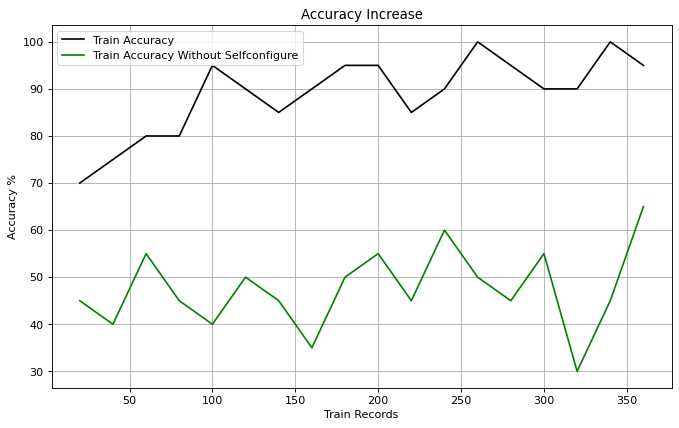

In [130]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
plt.title("Accuracy Increase")
#plt.plot(*zip(* improvedTestAccuracy[:100]), color='darkblue',  label="Updated Test Accuracy")
#plt.plot( *zip(* testAccuracy[:100]), color='red',  label="Test Accuracy")
#plt.plot( *zip(*  trainPreAccuracy[:100]), color='yellow',  label="Train Pre Accuracy")
plt.plot( *zip(*  trainAccuracy[:100]), color='black',  label="Train Accuracy")
plt.plot( *zip(*  trainAccuracyDefault[:100]), color='green',  label="Train Accuracy Without Selfconfigure")
#plt.plot( *zip(*  trainPreAccuracyDefault[:100]), color='orange',  label="Train Pre Accuracy Without Reconfigure")

#plt.plot( *zip(*  testDefaultAccuracy[:100]), color='purple',  label="Test Accuracy Without Reconfigure")

plt.xlabel("Train Records")
plt.ylabel("Accuracy %")

plt.grid(True)
plt.legend()

plt.show()

In [131]:
#arrFinal=arrFinal[1:,]
arrFinal=arrFinal[400:,]
arrFinalDefault=arrFinalDefault[400:,]

In [132]:
arrFinalY=arrFinal[:,10:]
arrFinalY
arrFinalX=arrFinal[:,0:10]
arrFinalX

arrFinalYDefault=arrFinalDefault[:,10:]
arrFinalYDefault
arrFinalXDefault=arrFinalDefault[:,0:10]
arrFinalXDefault

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [133]:
arrFinalX=np.array(arrFinalX, dtype=np.float)
arrFinalY=np.array(arrFinalY, dtype=np.float)

arrFinalXDefault=np.array(arrFinalXDefault, dtype=np.float)
arrFinalYDefault=np.array(arrFinalYDefault, dtype=np.float)

In [134]:
_, accuracy = model.evaluate(arrFinalX, arrFinalY, verbose=0)
print(accuracy)
#model.partial_fit(XTrain, yTrain,  classes=[5])#, epochs=150, batch_size=10, verbose=0)
#model.fit(arrFinalX , arrFinalY )

0.4710743725299835


In [135]:
_, accuracy = modelDefault.evaluate(arrFinalXDefault, arrFinalYDefault, verbose=0)
print(accuracy)

0.32231405377388


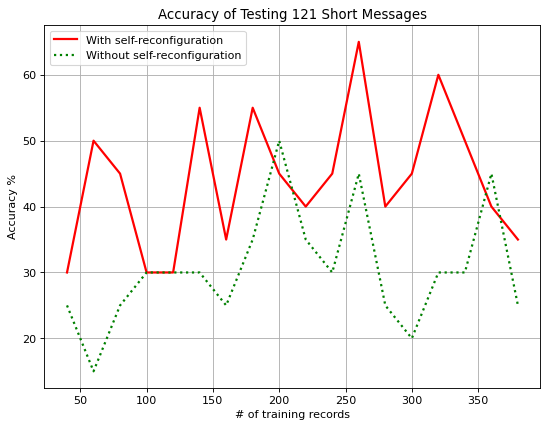

In [152]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.title("Accuracy of Testing 121 Short Messages")
#plt.plot(*zip(* improvedTestAccuracy[:100]), color='darkblue',  label="Updated Test Accuracy")
line1=plt.plot( *zip(* testAccuracy), color='red',  label="With self-reconfiguration")
#plt.plot( *zip(*  trainPreAccuracy[:100]), color='yellow',  label="Train Pre Accuracy")
#plt.plot( *zip(*  trainAccuracy[:100]), color='black',  label="Train Accuracy")
#plt.plot( *zip(*  trainAccuracyDefault[:100]), color='green',  label="Train Accuracy Without Selfconfigure")
#plt.plot( *zip(*  trainPreAccuracyDefault[:100]), color='orange',  label="Train Pre Accuracy Without Reconfigure")

line2=plt.plot( *zip(*  testDefaultAccuracy), color='purple',  label="Without self-reconfiguration")

plt.xlabel("# of training records")
plt.ylabel("Accuracy %")
plt.setp(line1, linewidth=2, color='r')
plt.setp(line2, linewidth=2, color='g')
plt.setp(line2, linestyle=':')
plt.grid(True)
plt.legend()

plt.show()

In [137]:
#_, accuracy = model.evaluate(arrFinalX, arrFinalY, verbose=0)
#print(accuracy)
#model.partial_fit(XTrain, yTrain,  classes=[5])#, epochs=150, batch_size=10, verbose=0)
predict_x=model.predict(arrFinalX)

predict_x

array([[2.73659225e-06, 2.38925428e-03, 4.52561036e-12, 1.17527868e-03,
        9.96432662e-01],
       [6.87581603e-04, 9.99261677e-01, 1.28123692e-10, 7.31939953e-10,
        5.07573131e-05],
       [2.42429490e-08, 1.15223334e-03, 2.70890510e-08, 9.92203712e-01,
        6.64396258e-03],
       [3.70223567e-08, 1.00000000e+00, 1.08041831e-12, 2.63808835e-15,
        5.80894454e-16],
       [1.80595773e-12, 9.34903562e-01, 1.00993178e-14, 6.40911162e-02,
        1.00539008e-03],
       [8.66395879e-08, 9.99999881e-01, 8.49655022e-14, 2.00713977e-11,
        2.29921702e-12],
       [5.46510000e-06, 9.91179645e-01, 1.64627971e-04, 8.32435396e-03,
        3.25904984e-04],
       [2.94263114e-10, 8.66377231e-05, 1.31459259e-15, 7.83006754e-03,
        9.92083311e-01],
       [3.03497491e-05, 9.98381972e-01, 1.48232260e-11, 7.91883167e-07,
        1.58679928e-03],
       [1.26642476e-06, 1.39645925e-02, 9.86034095e-01, 2.88980733e-08,
        1.94003147e-09],
       [6.03444736e-21, 9.9971

In [138]:
predict_xDefault=modelDefault.predict(arrFinalXDefault)
#predict_xDefault

In [139]:
#summary of self-configure testing
arrResult=np.empty((1,3),dtype=object)
for index  in range(len(predict_x)):
    #print( predict_x[index])
    #print( colTarget[np.argmax(arrFinalY[index])]+":"+ colTarget[np.argmax(predict_x[index])])
    actualval=colTarget[np.argmax(arrFinalY[index])]
    predictedval=colTarget[np.argmax(predict_x[index])]
    isSame=actualval==predictedval
    arrResult=np.concatenate((arrResult, [[actualval,predictedval,isSame]]))
arrResult=arrResult[1:]
dfResult = pd.DataFrame(arrResult, columns = ['Actual','Predicted','Result'])
 
totalRealCount=dfResult[dfResult["Actual"]=='XRealX'].shape[0] 
totalXDisinformativeCount=dfResult[dfResult["Actual"]=='XDisinformativeX'].shape[0] 
totalFakeCount=dfResult[dfResult["Actual"]=='XFakeX'].shape[0] 
totalMisInformativeCount=dfResult[dfResult["Actual"]=='XMisInformativeX'].shape[0] 
totalUnverifiedCount=dfResult[dfResult["Actual"]=='XUnverifiedX'].shape[0] 
#print(totalActualCount,totalRealCount,totalFakeCount,totalMisInformativeCount,totalUnverifiedCount,dfResult.shape[0])

totalCorrectCount=dfResult[  (dfResult["Result"]=='True')].shape[0]
totalRealCorrectCount=dfResult[(dfResult["Actual"]=='XRealX') & (dfResult["Result"]=='True')].shape[0]
totalDisinformativeCorrectCount=dfResult[(dfResult["Actual"]=='XDisinformativeX') & (dfResult["Result"]=='True')].shape[0]
totalFakeCorrectCount=dfResult[(dfResult["Actual"]=='XFakeX') & (dfResult["Result"]=='True')].shape[0]
totalMisInformativeCorrectCount=dfResult[(dfResult["Actual"]=='XMisInformativeX') & (dfResult["Result"]=='True')].shape[0]
totalUnverifiedCorrectCount=dfResult[(dfResult["Actual"]=='XUnverifiedX') & (dfResult["Result"]=='True')].shape[0]
print(totalRealCorrectCount,totalDisinformativeCorrectCount,totalFakeCorrectCount,totalMisInformativeCorrectCount,totalUnverifiedCorrectCount,totalCorrectCount)

dfSUmmary= pd.DataFrame( columns = ['Class','Total','SelfConfiguration Correct Prediction','SelfConfiguration Accuracy%' ])
dr={'Class':'Disinformative','Total':totalXDisinformativeCount,'SelfConfiguration Correct Prediction':totalDisinformativeCorrectCount,'SelfConfiguration Accuracy%':round(100*totalDisinformativeCorrectCount/totalXDisinformativeCount) }
dfSUmmary=dfSUmmary.append(dr,ignore_index = True ) 
dr={'Class':'Real','Total':totalRealCount,'SelfConfiguration Correct Prediction':totalRealCorrectCount,'SelfConfiguration Accuracy%':round(100*totalRealCorrectCount/totalRealCount) }
dfSUmmary=dfSUmmary.append(dr,ignore_index = True ) 
dr={'Class':'Fake','Total':totalFakeCount,'SelfConfiguration Correct Prediction':totalFakeCorrectCount,'SelfConfiguration Accuracy%':round(100*totalFakeCorrectCount/totalFakeCount) }
dfSUmmary=dfSUmmary.append(dr,ignore_index = True ) 
dr={'Class':'MisInformative','Total':totalMisInformativeCount,'SelfConfiguration Correct Prediction':totalMisInformativeCorrectCount,'SelfConfiguration Accuracy%':round(100*totalMisInformativeCorrectCount/totalMisInformativeCount) }
dfSUmmary=dfSUmmary.append(dr,ignore_index = True ) 
dr={'Class':'Unverified','Total':totalUnverifiedCount,'SelfConfiguration Correct Prediction':totalUnverifiedCorrectCount,'SelfConfiguration Accuracy%':round(100*totalUnverifiedCorrectCount/totalUnverifiedCount) }
dfSUmmary=dfSUmmary.append(dr,ignore_index = True )
dr={'Class':'Total','Total':dfResult.shape[0],'SelfConfiguration Correct Prediction':totalCorrectCount,'SelfConfiguration Accuracy%':round(100*totalCorrectCount/dfResult.shape[0]) }
dfSUmmary=dfSUmmary.append(dr,ignore_index = True )


dfSUmmary
# dfSUmmary
# dr

11 2 28 3 13 57


,Class,Total,SelfConfiguration Correct Prediction,SelfConfiguration Accuracy%
0,Disinformative,4,2,50
1,Real,38,11,29
2,Fake,35,28,80
3,MisInformative,4,3,75
4,Unverified,40,13,32
5,Total,121,57,47


In [140]:
#Predict without configure
arrResultDefault=np.empty((1,3),dtype=object)

for index  in range(len(predict_xDefault)):
    actualvalDefault=colTarget[np.argmax(arrFinalYDefault[index])]
    predictedvalDefault=colTarget[np.argmax(predict_xDefault[index])]
    isSameDefault=actualvalDefault==predictedvalDefault
    arrResultDefault=np.concatenate((arrResultDefault, [[actualvalDefault,predictedvalDefault,isSameDefault]]))

arrResultDefault=arrResultDefault[1:]
dfResultDefault = pd.DataFrame(arrResultDefault, columns = ['Actual','Predicted','Result'])
 
totalCorrectCountDefault=dfResultDefault[  (dfResultDefault["Result"]=='True')].shape[0]
totalRealCorrectCountDefault=dfResultDefault[(dfResultDefault["Actual"]=='XRealX') & (dfResultDefault["Result"]=='True')].shape[0]
totalDisinformativeCorrectCountDefault=dfResultDefault[(dfResultDefault["Actual"]=='XDisinformativeX') & (dfResultDefault["Result"]=='True')].shape[0]
totalFakeCorrectCountDefault=dfResultDefault[(dfResultDefault["Actual"]=='XFakeX') & (dfResultDefault["Result"]=='True')].shape[0]
totalMisInformativeCorrectCountDefault=dfResultDefault[(dfResultDefault["Actual"]=='XMisInformativeX') & (dfResultDefault["Result"]=='True')].shape[0]
totalUnverifiedCorrectCountDefault=dfResultDefault[(dfResultDefault["Actual"]=='XUnverifiedX') & (dfResultDefault["Result"]=='True')].shape[0]

dfSUmmary['CorrectPredictionWithoutConfigure']=0
dfSUmmary['Accuracy%WithoutConfigure']=0

dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Disinformative']['CorrectPredictionWithoutConfigure'].idxmax(),'CorrectPredictionWithoutConfigure']=totalDisinformativeCorrectCountDefault
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Fake']['CorrectPredictionWithoutConfigure'].idxmax(),'CorrectPredictionWithoutConfigure']=totalFakeCorrectCountDefault
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Real']['CorrectPredictionWithoutConfigure'].idxmax(),'CorrectPredictionWithoutConfigure']=totalRealCorrectCountDefault
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='MisInformative']['CorrectPredictionWithoutConfigure'].idxmax(),'CorrectPredictionWithoutConfigure']=totalMisInformativeCorrectCountDefault
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Unverified']['CorrectPredictionWithoutConfigure'].idxmax(),'CorrectPredictionWithoutConfigure']=totalUnverifiedCorrectCountDefault
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Total']['CorrectPredictionWithoutConfigure'].idxmax(),'CorrectPredictionWithoutConfigure']=totalCorrectCountDefault

dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Disinformative']['Accuracy%WithoutConfigure'].idxmax(),'Accuracy%WithoutConfigure']=round(100*totalDisinformativeCorrectCountDefault/totalXDisinformativeCount)
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Fake']['Accuracy%WithoutConfigure'].idxmax(),'Accuracy%WithoutConfigure']=round(100*totalFakeCorrectCountDefault/totalFakeCount)
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Real']['Accuracy%WithoutConfigure'].idxmax(),'Accuracy%WithoutConfigure']=round(100*totalRealCorrectCountDefault/totalRealCount) 
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='MisInformative']['Accuracy%WithoutConfigure'].idxmax(),'Accuracy%WithoutConfigure']=round(100*totalMisInformativeCorrectCountDefault/totalMisInformativeCount) 
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Unverified']['Accuracy%WithoutConfigure'].idxmax(),'Accuracy%WithoutConfigure']=round(100*totalUnverifiedCorrectCountDefault/totalUnverifiedCount)
dfSUmmary.loc[dfSUmmary[dfSUmmary.Class=='Total']['Accuracy%WithoutConfigure'].idxmax(),'Accuracy%WithoutConfigure']=round(100*totalCorrectCountDefault/dfResultDefault.shape[0]) 
 
dfSUmmary.loc[:,['Class','Total','SelfConfiguration Correct Prediction','CorrectPredictionWithoutConfigure','SelfConfiguration Accuracy%','Accuracy%WithoutConfigure']].style.hide_index()
 
 

Class,Total,SelfConfiguration Correct Prediction,CorrectPredictionWithoutConfigure,SelfConfiguration Accuracy%,Accuracy%WithoutConfigure
Disinformative,4,2,2,50,50
Real,38,11,1,29,3
Fake,35,28,31,80,89
MisInformative,4,3,0,75,0
Unverified,40,13,5,32,12
Total,121,57,39,47,32
